# <font color=black> Analysis - FC-based parcellation using correlation </font>
<hr style="border:1px solid black">

In [1]:
import sys,json
import glob, os
import numpy as np
import nibabel as nib
import time

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Initialization
<hr style="border:0.5px solid black">

### Load configuration file 

In [2]:
# Load the config file with all information
with open('../../config/config_fc_based_parcellation_NK.json') as config_file:
    config = json.load(config_file)

### Set relevant parameters

In [3]:
# Define tag of this analysis (used for saving)
config['output_tag'] = "dorsal_to_postcentral_sensory"
# Define source, target, and the corresponding masks
source = 'spinalcord'
target = 'brain'
# Note: paths should be with respect to main directory
config['masks']['brain'] = "/templates/MNI_hc_project/julich_postcentral_sensory.nii.gz"
config['masks']['spinalcord'] = "/templates/PAM50_hc_project/template/PAM50_cord_C1toC8_D.nii.gz"
config['list_subjects'] = ["P030", "P099","A006","A007","A008","A009","A011","A013","A023","A024","A025","A026","A027","A028","A029","A030","A032","A033","A034","A036","A037","A038","A039","A043"]

### Instantiate class
_Note: this will save a config file with all relevant information and prepare folder structure_

In [4]:
fc_parcellation = FC_Parcellation(config,source,target,'corr')

# Analyses
<hr style="border:0.5px solid black">

### Compute the voxelwise correlation & run clustering for each subject independently

In [ ]:
start = time.time()
# Loop through the subjects to compute fc and clustering 
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')
    # Compute correlation without saving files
    dict_corr = fc_parcellation.compute_voxelwise_fc(sub=sub, 
                                                  load_from_file=True, 
                                                  save_results=True)
    # Run clustering and save labels
    fc_parcellation.run_clustering(dict_corr,
                                    k_range=range(5,20),algorithm='kmeans',
                                    overwrite=False,
                                    save_results=True)
print("\033[1m... Operation performed in %.2f s!\033[0m" % (time.time() - start))

### Compute the group-level clustering and generate corresponding maps

In [23]:
start = time.time()
fc_parcellation.group_clustering(k_range=range(5,6),overwrite=True)
print("\033[1m... Operation performed in %.7f s!\033[0m" % (time.time() - start))

CLUSTERING AT THE GROUP LEVEL
K value(s) = range(5, 6)
Overwrite results = True
Saving results = True


K = 5
... Computing hierarchical clustering and relabeling
...... Loading all subjects
...... Clustering on all labels
...... Computing cophenetic correlation
...... Relabeling
Unexpected exception formatting exception. Falling back to standard exception


multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/kinany/anaconda3/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/home/kinany/anaconda3/lib/python3.9/multiprocessing/pool.py", line 51, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/fc_based_parcellation.py", line 609, in process_permutation
    d = dict(zip(np.unique(x), permutation))
TypeError: 'FC_Parcellation' object is not iterable
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/kinany/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2268960/3964099946.py", line 2, in <cell line: 2>
    fc_parcellation.group_clustering(k_range=range(5,6),overwrite=Tr

In [ ]:
fc_parcellation.prepare_target_maps(label_type='indiv',k_range=range(5,20),overwrite=True, save_results=True)

### Plot validity metrics

VALIDITY METRICS
K value(s) = range(5, 10)
Saving figures = False



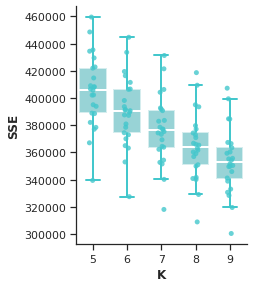

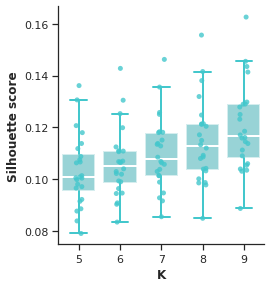

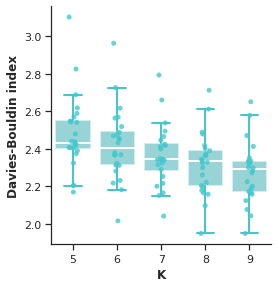

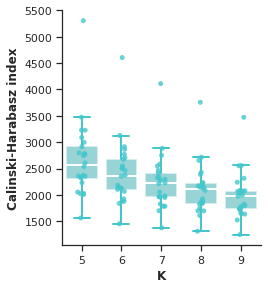

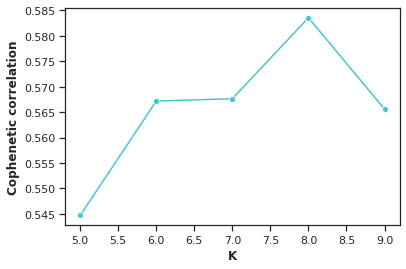

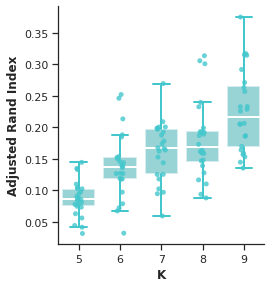

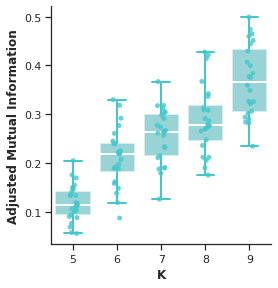

In [7]:
fc_parcellation.plot_validity(k_range=range(5,10),internal=["SSE","silhouette","davies","calinski"],group=["corr","ari","ami"], save_figures=False)